Average demand: 99.58357459931139
Demand standard deviation: 30.575965667689054
Non-stockout probability: 0.949
Fill-rate: 0.9936490112003838
Average profit: 440.5600838916488
Standard deviation profit:  263.23100549862096
90% confidence interval: [7.1817301315918485;873.9384376517057]


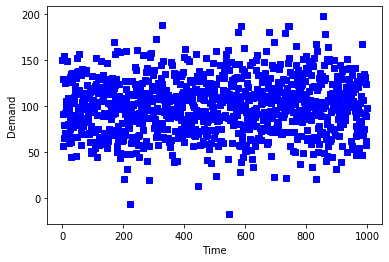

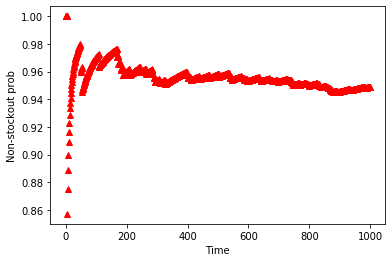

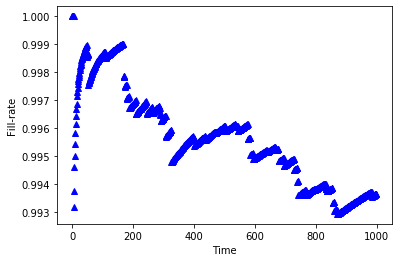

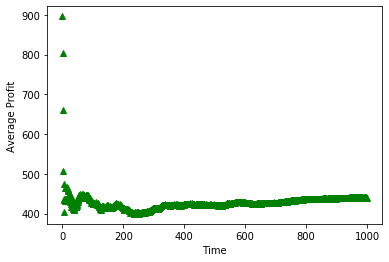

In [2]:
# Monte Carlo Simulation of Newsvendor Problem

import random
import numpy as np
import scipy #t distribution
from scipy.stats import t
import matplotlib.pyplot as plt

quantity = 150
replications = 1000 #not good idea to hard code rep number but loop until get 5% confident interval or 
salesprice = 10
procurementcost = 4
salvagevalue = 1
mu=100
sigma=30

satisfied = []
nostockout = []
profit = []
demandseries = []
periods = []

for k in range(replications):
    periods.append(k)
    demand = random.normalvariate(mu,sigma)
    demandseries.append(demand)
    if quantity >= demand:
        nostockout.append(1)
    else: nostockout.append(0)    
    satisfied.append(min(quantity,demand))
    profit.append(salesprice*min(quantity,demand)+salvagevalue*(max(0,quantity-demand))-procurementcost*quantity)

#print(satisfied)
#print(profit)
print("Average demand: "+str(np.mean(demandseries)))
print("Demand standard deviation: "+str(np.std(demandseries)))
print("Non-stockout probability: "+str(np.sum(nostockout)/replications))
print("Fill-rate: "+str(np.sum(satisfied)/np.sum(demandseries))) #overall fill rate (not fill rate for each demand)
print("Average profit: "+str(np.mean(profit)))
print("Standard deviation profit:  "+str(np.std(profit)))
print("90% confidence interval: ["+str(np.mean(profit)-np.std(profit)*t.ppf((1+0.9)/2,len(profit)-1))+";"+str(np.mean(profit)+np.std(profit)*t.ppf((1+0.9)/2,len(profit)-1))+"]")

nru = []
fru = []
pru = []
for k in range(replications):
  nru.append(np.sum(nostockout[:k+1])/(k+1))
  fru.append(np.sum(satisfied[:k+1])/np.sum(demandseries[:k+1]))  
  pru.append(np.mean(profit[:k+1]))
             
plt.plot(periods,demandseries,'bs')
#plt.plot(periods,satisfied,'g^')
plt.xlabel("Time")
plt.ylabel("Demand")
plt.show()

plt.plot(periods,nru,'r^')
plt.xlabel("Time")
plt.ylabel("Non-stockout prob")
plt.show()

plt.plot(periods,fru,'b^')
plt.xlabel("Time")
plt.ylabel("Fill-rate")
plt.show()

plt.plot(periods,pru,'g^')
plt.xlabel("Time")
plt.ylabel("Average Profit")
plt.show()

6